In [1]:
!pip install XGboost
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [3]:
houses_train = pd.read_csv("H:\\train.csv", header=0, delimiter=',')
houses_train.head()
houses_train.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [4]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


#We start examining our data to fill missing values

In [5]:
null_columns = houses_train.columns[houses_train.isnull().any()]
houses_train[null_columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
houses_test = pd.read_csv("H:\\test.csv", header=0, delimiter=',')
houses_test.head()
houses_test.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

In [7]:
houses_train = houses_train.drop(columns = ['PoolQC', 'Fence', 'MiscFeature', 'Alley']) #We start deleting the features with more than half of null values
houses_test = houses_test.drop(columns = ['PoolQC', 'Fence', 'MiscFeature', 'Alley'])
null_columns.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'])

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

#Now, for the rest of data, we will first do an exploration of the data to, among other things, decide which is the best way to imput the missing values

In [8]:
# Collect the names of the Categorical and Numeric Variables seperately
num_columns = houses_train.select_dtypes(include=np.number).columns.tolist()
num_columns.remove("SalePrice") # Capturing feature names exclusively
cat_columns = houses_train.select_dtypes(exclude=np.number).columns.tolist()

# Check if the number makes sense (+1 for the target variable that was dropped)
len(num_columns) + len(cat_columns) + 1 == len(houses_train.columns)

True

In [9]:
for col in cat_columns:
    print(col + ": " + str(len(houses_train[col].unique()))) # we print categorical data columns and their distinct amount of categories

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
KitchenQual: 4
Functional: 7
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 6
GarageCond: 6
PavedDrive: 3
SaleType: 9
SaleCondition: 6


<Figure size 2304x1152 with 0 Axes>

<AxesSubplot:>

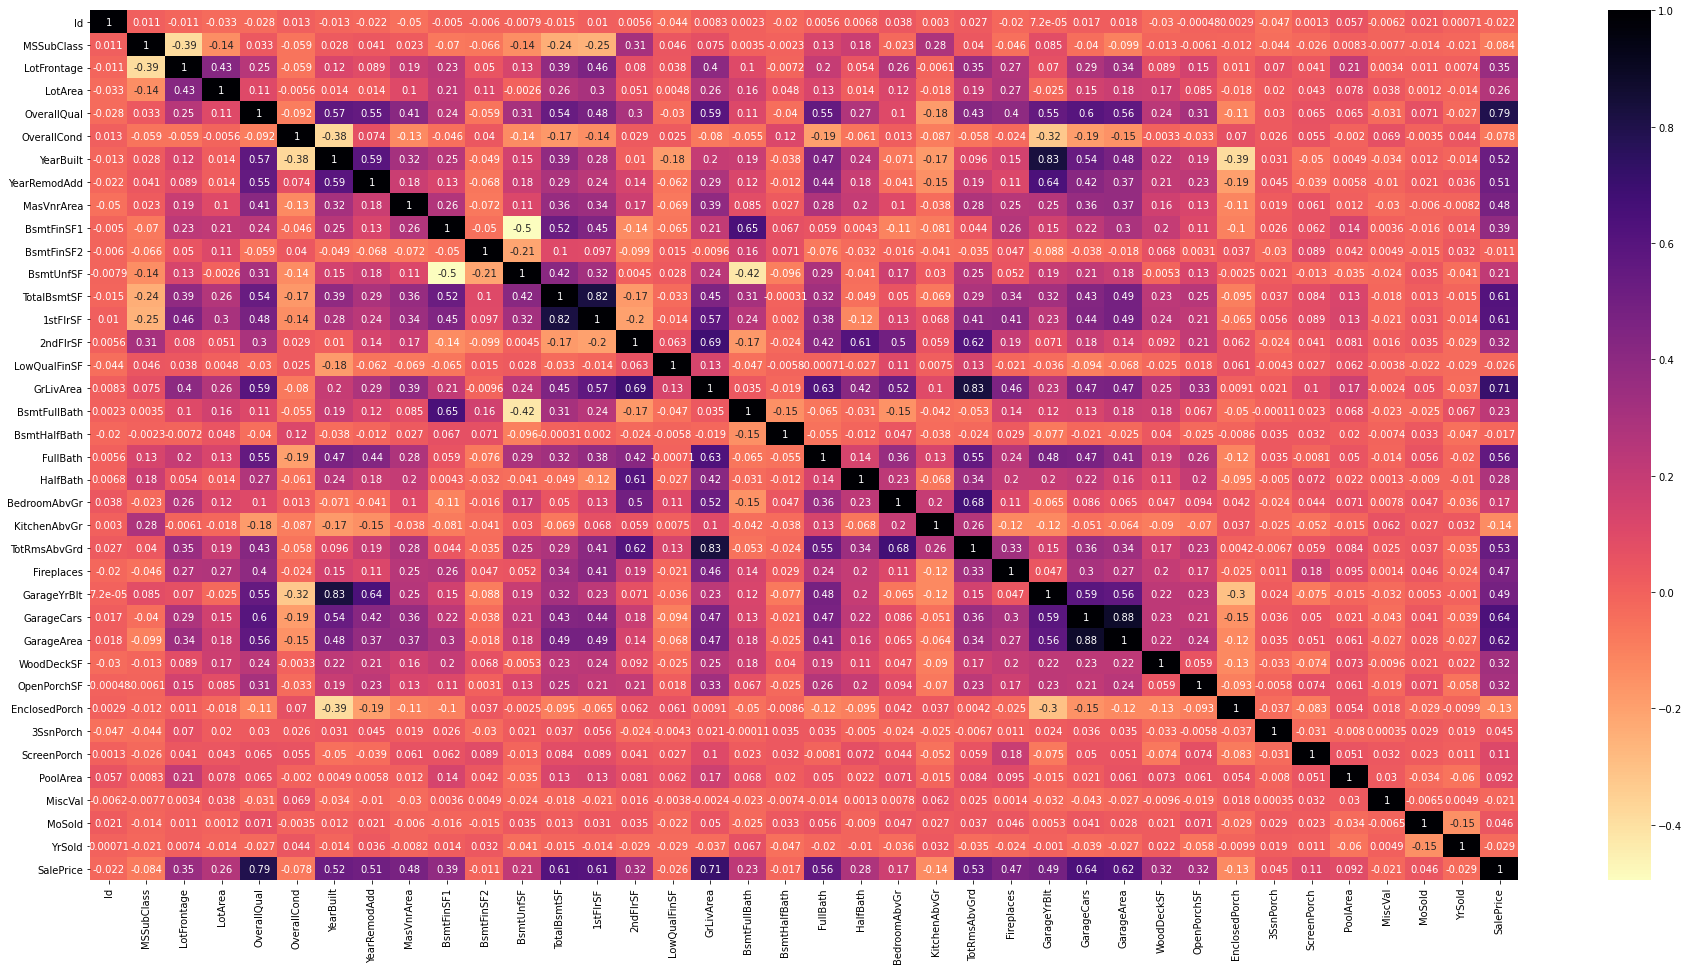

In [10]:
#We start visualizing a heat map for all numerical features
plt.figure(figsize=(32,16))
sn.heatmap(houses_train.corr(),cmap='magma_r',annot=True) #Big correlation between YearBuilt and GarageYrBuilt -> delete GarageYrBuilt (difficult to impute null values)
houses_test = houses_test.drop(columns = 'GarageYrBlt', axis = 1)
houses_train = houses_train.drop(columns = 'GarageYrBlt', axis = 1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

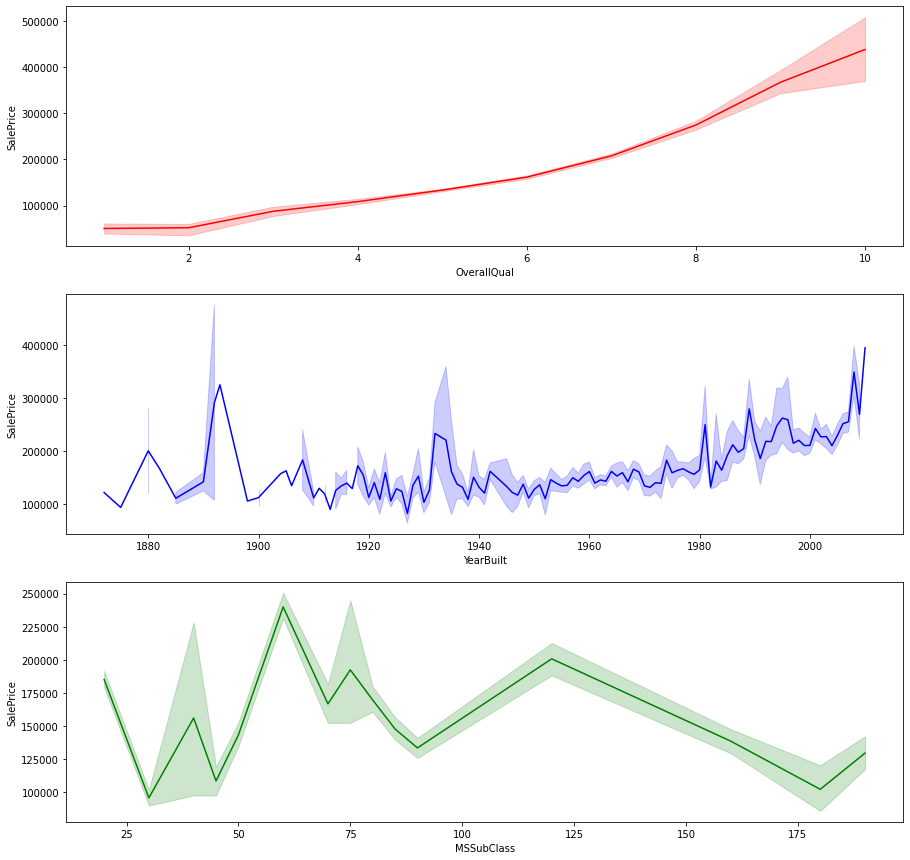

In [11]:
fig,ax = plt.subplots(3,1,figsize=(15,15))
sn.lineplot(x=houses_train['OverallQual'],y=houses_train.SalePrice,ax=ax[0],color='r') #We visualize 3 features with different levels of correlation with SalePrice
sn.lineplot(x=houses_train['YearBuilt'],y=houses_train.SalePrice,ax=ax[1],color='b')
sn.lineplot(x=houses_train['MSSubClass'],y=houses_train.SalePrice,ax=ax[2],color='g')

procede to input the values to the categorical data

In [12]:
def fill_nulls(houses_df):
    houses_df.loc[houses_df.FireplaceQu.isna(),'FireplaceQu'] = 'None'
    houses_df.loc[houses_df.GarageType.isna(),'GarageType'] = 'None' #No garage >>
    houses_df.loc[houses_df.GarageFinish.isna(),'GarageFinish'] = 'None' #>>
    houses_df.loc[houses_df.GarageQual.isna(),'GarageQual'] = 'None' #>>
    houses_df.loc[houses_df.GarageCond.isna(),'GarageCond'] = 'None' #>>
    houses_df.loc[houses_df.BsmtExposure.isna(),'BsmtExposure'] = 'None' #No basement >>
    houses_df.loc[houses_df.BsmtFinType2.isna(),'BsmtFinType2'] = 'None' #>>
    houses_df.loc[houses_df.BsmtCond.isna(),'BsmtCond'] = 'None' #>>
    houses_df.loc[houses_df.BsmtFinType1.isna(),'BsmtFinType1'] = 'None' #>>
    houses_df.loc[houses_df.BsmtQual.isna(),'BsmtQual'] = 'None' #>>
    houses_df.loc[houses_df.MasVnrType.isna(),'MasVnrType'] = 'None' #No masonry >>
    houses_df.loc[houses_df.MasVnrArea.isna(),'MasVnrArea'] = 0 #>>
    houses_df.loc[houses_df.LotFrontage.isna(),'LotFrontage'] = 0 #No lot frontage
    houses_df = houses_df.loc[~houses_df.Electrical.isna()] #Dropping ONE row with Nan value in 'Electrical'
    houses_df.loc[houses_df.MSZoning.isna(),'MSZoning'] = 'None'
    houses_df.loc[houses_df.Utilities.isna(),'Utilities'] = 'None'
    houses_df.loc[houses_df.Exterior1st.isna(),'Exterior1st'] = 'None'
    houses_df.loc[houses_df.Exterior2nd.isna(),'Exterior2nd'] = 'None'
    houses_df.loc[houses_df.BsmtFinSF1.isna(),'BsmtFinSF1'] = 0
    houses_df.loc[houses_df.BsmtFinSF2.isna(),'BsmtFinSF2'] = 0
    houses_df.loc[houses_df.BsmtUnfSF.isna(),'BsmtUnfSF'] = 0
    houses_df.loc[houses_df.TotalBsmtSF.isna(),'TotalBsmtSF'] = 0
    houses_df.loc[houses_df.BsmtFullBath.isna(),'BsmtFullBath'] = 0
    houses_df.loc[houses_df.BsmtHalfBath.isna(),'BsmtHalfBath'] = 0
    houses_df.loc[houses_df.KitchenQual.isna(),'KitchenQual'] = 'None'
    houses_df.loc[houses_df.Functional.isna(),'Functional'] = 'None'
    houses_df.loc[houses_df.GarageCars.isna(),'GarageCars'] = 0
    houses_df.loc[houses_df.GarageArea.isna(),'GarageArea'] = 0
    houses_df.loc[houses_df.SaleType.isna(),'SaleType'] = 'None'
    return houses_df

houses_train = fill_nulls(houses_train)
houses_test = fill_nulls(houses_test)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
null_columns = houses_train.columns[houses_train.isnull().any()] #No more null values left
print(null_columns)

Index([], dtype='object')


In [14]:
houses_train['FireplaceQu'].value_counts() #There's a lot of categorical data with this punctuation method

None    689
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [15]:
#We substitute all categorical that follow that common punctuation method with integers because in this case the categories do follow an order.
def new_punctuation(houses_df):
    houses_df['ExterQual'] = houses_df['ExterQual'].map({'Ex':5,'Fa':2,'Gd':4,'TA':3,'Po':1,'None':0}).astype('int64')
    houses_df['ExterCond'] = houses_df['ExterCond'].map({'Ex':5,'Fa':2,'Gd':4,'TA':3,'Po':1,'None':0}).astype('int64')
    houses_df['BsmtQual'] = houses_df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}).astype('int64')
    houses_df['BsmtCond'] = houses_df['BsmtCond'].map({'Ex':5,'Fa':2,'Gd':4,'TA':3,'Po':1,'None':0}).astype('int64')
    houses_df['BsmtExposure'] = houses_df['BsmtExposure'].map({'Av':3,'Gd':4,'Mn':2,'No':1,'None':0}).astype('int64')
    houses_df['BsmtFinType1'] = houses_df['BsmtFinType1'].map({'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1}).astype('int64')
    houses_df['BsmtFinType2'] = houses_df['BsmtFinType2'].map({'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1}).astype('int64')
    houses_df['HeatingQC'] = houses_df['HeatingQC'].map({'Ex':5, 'Fa':2, 'Gd':4, 'Po':1, 'TA':3,'None':0}).astype('int64')
    houses_df['KitchenQual'] = houses_df['KitchenQual'].map({'Ex':5,'Fa':2,'Gd':4,'TA':3,'Po':1,'None':0}).astype('int64')
    houses_df['FireplaceQu'] = houses_df['FireplaceQu'].map({'Ex':5, 'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3}).astype('int64')
    houses_df['GarageCond'] = houses_df['GarageCond'].map({'Ex':5, 'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3}).astype('int64')
    houses_df['GarageQual'] = houses_df['GarageQual'].map({'Ex':5, 'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3}).astype('int64')
    return houses_df

houses_train = new_punctuation(houses_train)
houses_test = new_punctuation(houses_test)

In [16]:
cat_columns = houses_train.select_dtypes(exclude=np.number).columns.tolist() 
cat_columns_2 = houses_test.select_dtypes(exclude=np.number).columns.tolist()
print(houses_train['SaleType'].value_counts())
print(cat_columns)
print(cat_columns == cat_columns_2) #Train and test dataframes have the same categorical columns

WD       1266
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
True


In [17]:
cat_columns = houses_train.select_dtypes(exclude=np.number).columns.tolist() 
enc = preprocessing.OrdinalEncoder(dtype = int)
houses_train[cat_columns] = enc.fit_transform(houses_train[cat_columns])
houses_test[cat_columns] = enc.fit_transform(houses_test[cat_columns])

print(houses_train.select_dtypes(exclude=np.number).columns.tolist())

[]


In [18]:
X = houses_train.drop("SalePrice", axis=1)
Y = houses_train["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [19]:
xgb_model = xgb.XGBRegressor()
cvxgb = cross_val_score(xgb_model, x_train, y_train, cv = 5)
print(cvxgb)
print(cvxgb.mean())

[0.84554423 0.79868279 0.89793002 0.77556309 0.87977529]
0.8394990835930163


In [20]:
rf = RandomForestRegressor()
cvrf = cross_val_score(rf, x_train, y_train, cv = 5)
print(cvrf)
print(cvrf.mean())

[0.86458257 0.82733394 0.91186724 0.79079454 0.88061437]
0.855038529432323


In [21]:
houses_predicted = pd.read_csv("H:\\predicted.csv", header=0, delimiter=',')
houses_predicted.head()
houses_predicted.shape

,Id,SalePrice
0,1461,120788.442
1,1462,146559.033
2,1463,192180.730
3,1464,198226.523
4,1465,210962.351


(1459, 2)